In [1]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns


#https://altair-viz.github.io/gallery/errorbars_with_std.html
#import altair as alt
#from vega_datasets import data

#defining paths
results_milestones = 'Milestones - timesStandard-prod.csv'
dataBinary_milestones = pd.read_csv(results_milestones)


In [2]:
dataBinary_milestones

,Participant,start,issue,problem,folder,file,class,method,line,solution,...,sound solution,alternative answer,Gift card requested,Gift card received,group,issue_number,Control YOE,Control Contribs,Alt YOE,Alt Contrib
0,ItaloSantos,2:35 PM,17,17,18.0,18.0,19.0,21.0,21.0,24.0,...,n,NaN,y,y,Control,5679,4.0,0.0,NaN,NaN
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,...,y,NaN,y,y,Treatment,5485,NaN,NaN,7.0,0.0
2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,NaN,NaN,NaN,...,y,NaN,y,y,Treatment,4612,3.0,0.0,NaN,NaN
3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.0,23.0,27.0,27.0,46.0,...,y,y,y,y,Treatment,5194,NaN,NaN,9.0,9.0
4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,...,n,NaN,y,y,Control,4612,1.0,1.0,NaN,NaN
5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,...,y,y,y,y,Treatment,5069,NaN,NaN,4.0,2.0
6,ap3535@nau.edu,4:17 PM,6,12,27.0,27.0,29.0,40.0,41.0,43.0,...,y,NaN,y,y,Control,5485,NaN,NaN,NaN,NaN
7,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,...,n,NaN,y,y,Control,5485,1.0,1.0,NaN,NaN
8,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,...,y,NaN,y,y,Treatment,5485,NaN,NaN,2.0,0.0
9,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,...,y,NaN,y,NaN,Treatment,5485,NaN,NaN,5.0,1.0


In [3]:
#checking if I have to remove the NaN. Removing jk2396 to calculate the 'method' mean 

In [4]:
dataBinary_milestones_valid = dataBinary_milestones[['Participant','start','issue','problem','folder','file','class','method','line','solution','implement','end','group','issue_number']]

In [5]:
dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'ap3535@nau.edu'].index, inplace = True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'ItaloSantos'].index, inplace = True)


In [7]:
dataBinary_milestones_valid

,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55,Treatment,5485
2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,NaN,NaN,NaN,NaN,58,Treatment,4612
3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.0,23.0,27.0,27.0,46.0,46.0,46,Treatment,5194
4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56,Control,4612
5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38,Treatment,5069
7,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Control,5485
8,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46,Treatment,5485
9,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58,Treatment,5485
10,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,57.0,57.0,NaN,57,Control,5069
11,sm4332@nau.edu,3:12 PM,22,22,31.0,31.0,31.0,31.0,NaN,NaN,NaN,51,Control,4612


In [8]:
# finding mean of the column values with NaN i.e, for Units columns here
# so the Units column has 100, 150 and 80; therefore the mean would ne 110

dataBinary_milestones_valid_mean = dataBinary_milestones_valid.copy()

meanValI = dataBinary_milestones_valid['issue'].mean() 
meanValP = dataBinary_milestones_valid['problem'].mean() 
meanValFo = dataBinary_milestones_valid['folder'].mean() 
meanValFi = dataBinary_milestones_valid['file'].mean() 
meanValC = dataBinary_milestones_valid['class'].mean() 
meanValM = dataBinary_milestones_valid['method'].mean()
meanValL = dataBinary_milestones_valid['line'].mean() 
meanValS = dataBinary_milestones_valid['solution'].mean() 
meanValIm = dataBinary_milestones_valid['implement'].mean()
meanValE = dataBinary_milestones_valid['end'].mean()

# Replace NaNs with the mean of the column where it is located
# the mean calculated above is 110, so NaN values will be replaced with 110
dataBinary_milestones_valid_mean['issue'] = dataBinary_milestones_valid['issue'].fillna(value=meanValI)
dataBinary_milestones_valid_mean['problem'] = dataBinary_milestones_valid['problem'].fillna(value=meanValP)
dataBinary_milestones_valid_mean['folder'] = dataBinary_milestones_valid['folder'].fillna(value=meanValFo)
dataBinary_milestones_valid_mean['file'] = dataBinary_milestones_valid['file'].fillna(value=meanValFi)
dataBinary_milestones_valid_mean['class'] = dataBinary_milestones_valid['class'].fillna(value=meanValC)
dataBinary_milestones_valid_mean['method'] = dataBinary_milestones_valid['method'].fillna(value=meanValM)
dataBinary_milestones_valid_mean['line'] = dataBinary_milestones_valid['line'].fillna(value=meanValL)
dataBinary_milestones_valid_mean['solution'] = dataBinary_milestones_valid['solution'].fillna(value=meanValS)
dataBinary_milestones_valid_mean['implement'] = dataBinary_milestones_valid['implement'].fillna(value=meanValP)
dataBinary_milestones_valid_mean['end'] = dataBinary_milestones_valid['end'].fillna(value=meanValE)

dataBinary_milestones_valid_mean

,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.000000,45.000000,45.000000,46.000000,47.0,48.000000,50.0,55,Treatment,5485
2,gk325@nau.edu,3:09:00 PM,1,6,56.000000,56.000000,58.000000,42.636364,45.3,49.181818,22.0,58,Treatment,4612
3,sb3292@nau.edu,4:21:00 PM,3,19,23.000000,23.000000,23.000000,27.000000,27.0,46.000000,46.0,46,Treatment,5194
4,gummadisk99@gmail.com,1:20 PM,4,14,38.000000,38.000000,38.000000,41.000000,41.0,50.000000,56.0,56,Control,4612
5,hk486@nau.edu,3:22 PM,20,25,31.000000,31.000000,31.000000,32.000000,33.0,37.000000,38.0,38,Treatment,5069
7,kv582@nau.edu,12:44 PM,11,19,40.769231,41.153846,42.230769,42.636364,45.3,49.181818,22.0,35,Control,5485
8,vg588@nau.edu,4:34 PM,5,25,35.000000,35.000000,35.000000,37.000000,37.0,37.000000,46.0,46,Treatment,5485
9,ma3932@nau.edu,4:13 PM,7,33,43.000000,43.000000,43.000000,43.000000,43.0,43.000000,43.0,58,Treatment,5485
10,"nk545@nau,edu",3:14 PM,7,22,25.000000,25.000000,37.000000,46.000000,57.0,57.000000,22.0,57,Control,5069
11,sm4332@nau.edu,3:12 PM,22,22,31.000000,31.000000,31.000000,31.000000,45.3,49.181818,22.0,51,Control,4612


In [9]:
# finding mean of the column values with NaN i.e, for Units columns here
# so the Units column has 100, 150 and 80; therefore the mean would ne 110

dataBinary_milestones_valid_60 = dataBinary_milestones_valid.copy()


# Replace NaNs with the mean of the column where it is located
# the mean calculated above is 110, so NaN values will be replaced with 110
dataBinary_milestones_valid_60['issue'] = dataBinary_milestones_valid['issue'].fillna(60)
dataBinary_milestones_valid_60['problem'] = dataBinary_milestones_valid['problem'].fillna(60)
dataBinary_milestones_valid_60['folder'] = dataBinary_milestones_valid['folder'].fillna(60)
dataBinary_milestones_valid_60['file'] = dataBinary_milestones_valid['file'].fillna(60)
dataBinary_milestones_valid_60['class'] = dataBinary_milestones_valid['class'].fillna(60)
dataBinary_milestones_valid_60['method'] = dataBinary_milestones_valid['method'].fillna(60)
dataBinary_milestones_valid_60['line'] = dataBinary_milestones_valid['line'].fillna(60)
dataBinary_milestones_valid_60['solution'] = dataBinary_milestones_valid['solution'].fillna(60)
dataBinary_milestones_valid_60['implement'] = dataBinary_milestones_valid['implement'].fillna(60)
dataBinary_milestones_valid_60['end'] = dataBinary_milestones_valid['end'].fillna(60)

dataBinary_milestones_valid_60

,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55,Treatment,5485
2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,60.0,60.0,60.0,60.0,58,Treatment,4612
3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.0,23.0,27.0,27.0,46.0,46.0,46,Treatment,5194
4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56,Control,4612
5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38,Treatment,5069
7,kv582@nau.edu,12:44 PM,11,19,60.0,60.0,60.0,60.0,60.0,60.0,60.0,35,Control,5485
8,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46,Treatment,5485
9,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58,Treatment,5485
10,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,57.0,57.0,60.0,57,Control,5069
11,sm4332@nau.edu,3:12 PM,22,22,31.0,31.0,31.0,31.0,60.0,60.0,60.0,51,Control,4612


In [10]:
dataBinary_milestones_valid_60.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,9.166667,21.833333,44.833333,45.000,47.000,49.000,55.666667,57.166667,58.666667,52.500,5055.333333
Treatment,6.125000,22.125000,40.125000,40.625,40.875,44.375,44.875000,47.250000,50.375000,52.125,5259.750000


In [11]:
dataBinary_milestones_valid_mean.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,9.166667,21.833333,41.628205,41.858974,44.038462,46.106061,50.766667,53.560606,39.666667,52.500,5055.333333
Treatment,6.125000,22.125000,40.125000,40.625000,40.875000,40.034091,41.200000,45.897727,36.125000,52.125,5259.750000


In [12]:
dataBinary_milestones_valid.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,9.166667,21.833333,41.800,42.000,44.400,46.800000,53.500000,55.750000,57.333333,52.500,5055.333333
Treatment,6.125000,22.125000,40.125,40.625,40.875,39.166667,39.833333,45.428571,44.600000,52.125,5259.750000


In [13]:
dataBinary_milestones_valid_jk2396 = dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'jk2396@nau.edu'].index)


In [14]:
dataBinary_milestones_valid_jk2396

,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55,Treatment,5485
2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,NaN,NaN,NaN,NaN,58,Treatment,4612
3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.0,23.0,27.0,27.0,46.0,46.0,46,Treatment,5194
4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56,Control,4612
5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38,Treatment,5069
7,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Control,5485
8,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46,Treatment,5485
9,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58,Treatment,5485
10,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,57.0,57.0,NaN,57,Control,5069
11,sm4332@nau.edu,3:12 PM,22,22,31.0,31.0,31.0,31.0,NaN,NaN,NaN,51,Control,4612


In [15]:
#dataBinary_milestones_valid_jk2396 = dataBinary_milestones_valid_jk2396['method']

In [16]:
dataBinary_milestones_valid_jk2396[['method','group']].groupby(['group']).mean()

,method
group,
Control,46.800000
Treatment,39.166667


In [17]:
dataBinary_milestones_valid_T = dataBinary_milestones_valid[dataBinary_milestones_valid.group == 'Treatment']

In [18]:
dataBinary_milestones_valid_C = dataBinary_milestones_valid[dataBinary_milestones_valid.group == 'Control']

In [19]:
#dataBinary_milestones_valid_T[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='line',  ms=10)

#plt.show()

In [20]:
#dataBinary_milestones_valid_C[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='line',  ms=10)

#plt.show()

In [21]:
means = dataBinary_milestones_valid.groupby(['group']).mean()
means

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,9.166667,21.833333,41.800,42.000,44.400,46.800000,53.500000,55.750000,57.333333,52.500,5055.333333
Treatment,6.125000,22.125000,40.125,40.625,40.875,39.166667,39.833333,45.428571,44.600000,52.125,5259.750000


In [22]:
ypoints_C = means.iloc[0:1,0:9]
ypoints_C

,issue,problem,folder,file,class,method,line,solution,implement
group,,,,,,,,,
Control,9.166667,21.833333,41.8,42.0,44.4,46.8,53.5,55.75,57.333333


In [23]:
ypoints_C.to_csv('ypoints_C.csv',index=False)

In [24]:
ypoints_C2 = pd.read_csv('ypoints_C.csv')
ypoints_C2

,issue,problem,folder,file,class,method,line,solution,implement
0,9.166667,21.833333,41.8,42.0,44.4,46.8,53.5,55.75,57.333333


In [25]:
ypoints_T = means.iloc[1:2,0:9]
ypoints_T

,issue,problem,folder,file,class,method,line,solution,implement
group,,,,,,,,,
Treatment,6.125,22.125,40.125,40.625,40.875,39.166667,39.833333,45.428571,44.6


In [26]:
ypoints_T.to_csv('ypoints_T.csv',index=False)

In [27]:
ypoints_T2 = pd.read_csv('ypoints_T.csv')
ypoints_T2

,issue,problem,folder,file,class,method,line,solution,implement
0,6.125,22.125,40.125,40.625,40.875,39.166667,39.833333,45.428571,44.6


In [28]:
ypoints_T2.dtypes

issue        float64
problem      float64
folder       float64
file         float64
class        float64
method       float64
line         float64
solution     float64
implement    float64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

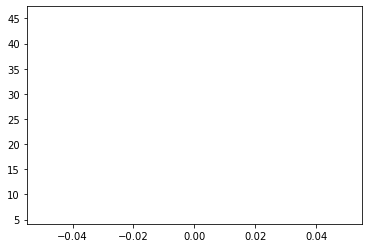

In [29]:

plt.plot(ypoints_T2, color='r')
plt.show

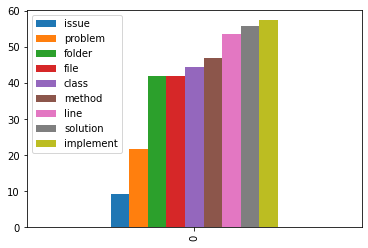

In [30]:
ypoints_C2[['issue','problem','folder','file','class','method','line','solution','implement']].plot(kind='bar')

plt.show()

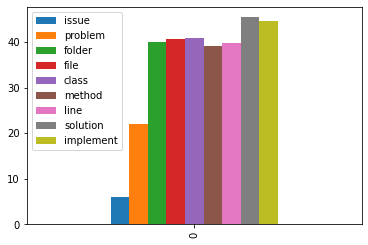

In [31]:
ypoints_T2[['issue','problem','folder','file','class','method','line','solution','implement']].plot(kind='bar')

plt.show()

In [32]:
dataBinary_milestones_valid.groupby(['issue_number']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end
issue_number,,,,,,,,,,
4612,9.00,14.0,41.666667,41.666667,42.333333,36.0,41.00,50.0,56.00,55.00
5069,10.25,32.5,39.750000,40.750000,43.750000,46.0,50.00,50.5,49.00,52.75
5194,3.00,19.0,23.000000,23.000000,23.000000,27.0,27.00,46.0,46.00,46.00
5485,6.00,18.0,44.500000,44.750000,44.750000,45.5,45.75,46.0,48.75,50.00
5679,3.00,27.0,45.000000,45.000000,45.000000,50.0,52.00,59.0,NaN,60.00


In [33]:
dataBinary_milestones_valid.groupby(['group','issue_number']).mean()

issue    problem     folder  file  class  method  \
group     issue_number                                                         
Control   4612          13.000000  18.000000  34.500000  34.5   34.5    36.0   
          5069           6.500000  33.000000  42.000000  42.5   48.5    53.0   
          5485           8.000000  14.500000  56.000000  56.0   56.0    56.0   
Treatment 4612           1.000000   6.000000  56.000000  56.0   58.0     NaN   
          5069          14.000000  32.000000  37.500000  39.0   39.0    32.0   
          5194           3.000000  19.000000  23.000000  23.0   23.0    27.0   
          5485           4.666667  20.333333  40.666667  41.0   41.0    42.0   
          5679           3.000000  27.000000  45.000000  45.0   45.0    50.0   

                             line   solution  implement   end  
group     issue_number                                         
Control   4612          41.000000  50.000000  56.000000  53.5  
          5069          58.500000  58.500000  60.000000  58.5  
          5485          56.000000  56.000000  56.000000  45.5  
Treatment 4612                NaN        NaN        NaN  58.0  
          5069          33.000000  42.500000  38.000000  47.0  
          5194          27.000000  46.000000  46.000000  46.0  
          5485          42.333333  42.666667  46.333333  53.0  
          5679          52.000000  59.000000        NaN  60.0

In [34]:
dataBinary_milestones_valid_T.groupby(['issue_number']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end
issue_number,,,,,,,,,,
4612,1.000000,6.000000,56.000000,56.0,58.0,NaN,NaN,NaN,NaN,58.0
5069,14.000000,32.000000,37.500000,39.0,39.0,32.0,33.000000,42.500000,38.000000,47.0
5194,3.000000,19.000000,23.000000,23.0,23.0,27.0,27.000000,46.000000,46.000000,46.0
5485,4.666667,20.333333,40.666667,41.0,41.0,42.0,42.333333,42.666667,46.333333,53.0
5679,3.000000,27.000000,45.000000,45.0,45.0,50.0,52.000000,59.000000,NaN,60.0


In [35]:
dataBinary_milestones_valid_C.groupby(['issue_number']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end
issue_number,,,,,,,,,,
4612,13.0,18.0,34.5,34.5,34.5,36.0,41.0,50.0,56.0,53.5
5069,6.5,33.0,42.0,42.5,48.5,53.0,58.5,58.5,60.0,58.5
5485,8.0,14.5,56.0,56.0,56.0,56.0,56.0,56.0,56.0,45.5


In [36]:
T_mean = dataBinary_milestones_valid_T.groupby(['issue_number']).mean()

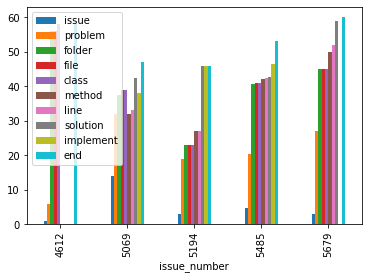

In [37]:
T_mean[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='bar')

plt.show()

In [38]:
C_mean = dataBinary_milestones_valid_C.groupby(['issue_number']).mean()

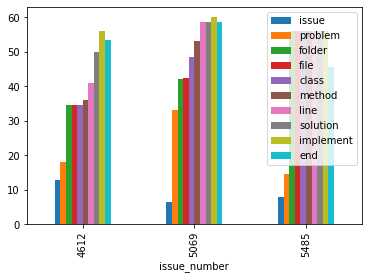

In [39]:
C_mean[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='bar')

plt.show()

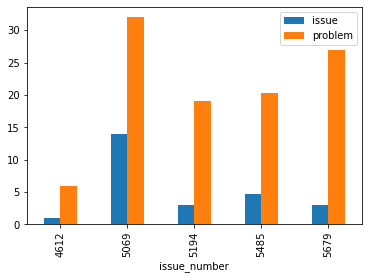

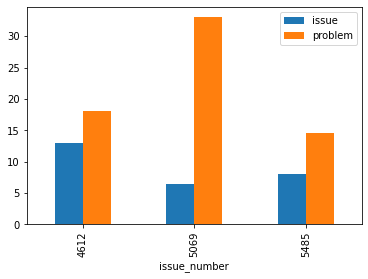

In [40]:
T_mean[['issue','problem']].plot(kind='bar')
C_mean[['issue','problem']].plot(kind='bar')

plt.show()

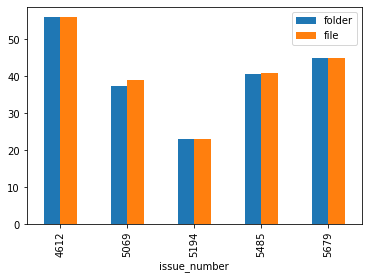

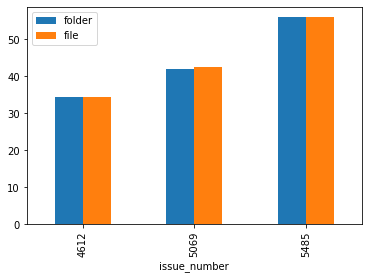

In [41]:
T_mean[['folder','file']].plot(kind='bar')
C_mean[['folder','file']].plot(kind='bar')

plt.show()

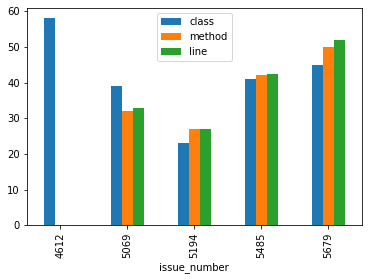

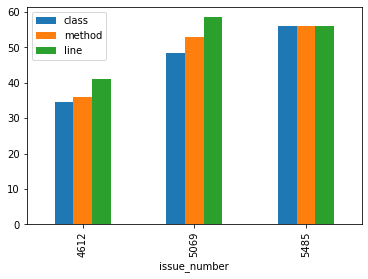

In [42]:
T_mean[['class','method', 'line']].plot(kind='bar')
C_mean[['class','method', 'line']].plot(kind='bar')

plt.show()

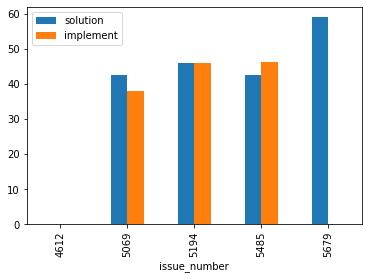

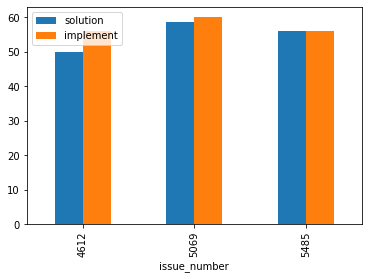

In [43]:
T_mean[['solution','implement']].plot(kind='bar')
C_mean[['solution','implement']].plot(kind='bar')

plt.show()

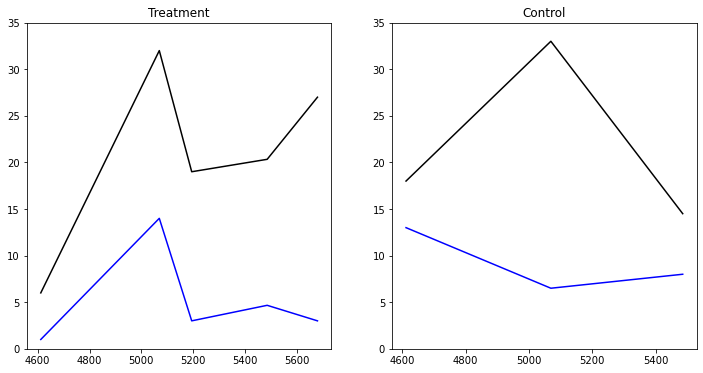

In [44]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.set_title('Treatment')
ax.plot(T_mean['issue'], color='blue', label='Treatment issue')
ax.plot(T_mean['problem'], color='black', label='Treatment problem')

ax2.set_title('Control')
ax2.plot(C_mean['issue'], color='blue', label='Control issue')
ax2.plot(C_mean['problem'], color='black', label='Control problem')

ax.set_ylim([0, 35])
ax2.set_ylim([0, 35])

plt.show()


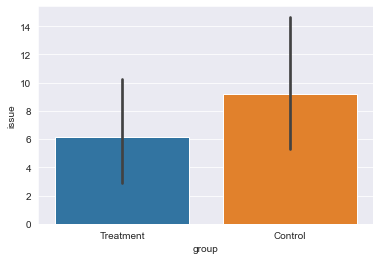

In [45]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "issue", data = dataBinary_milestones_valid)
plt.show()

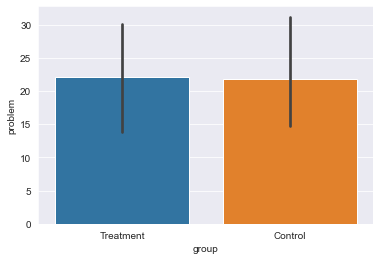

In [46]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "problem", data = dataBinary_milestones_valid)
plt.show()

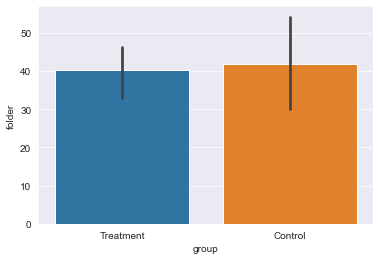

In [47]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "folder", data = dataBinary_milestones_valid)
plt.show()

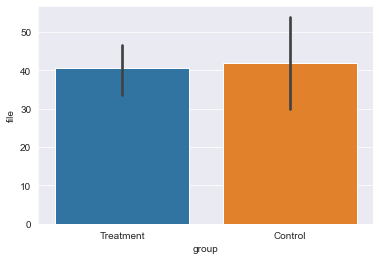

In [48]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "file", data = dataBinary_milestones_valid)
plt.show()

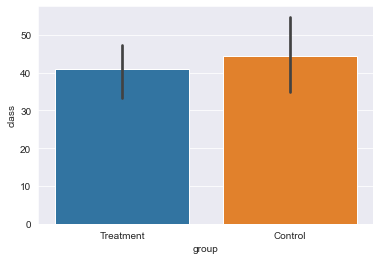

In [49]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "class", data = dataBinary_milestones_valid)
plt.show()

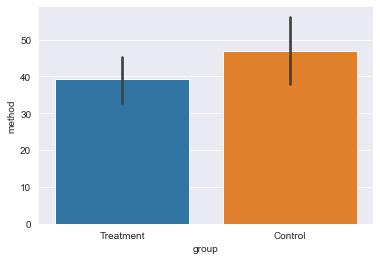

In [50]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "method", data = dataBinary_milestones_valid)
plt.show()

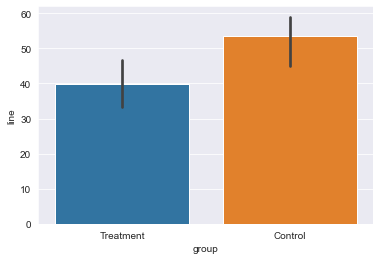

In [51]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "line", data = dataBinary_milestones_valid)
plt.show()

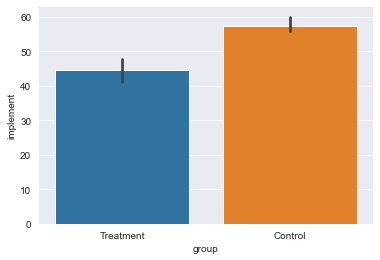

In [52]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "implement", data = dataBinary_milestones_valid)
plt.show()

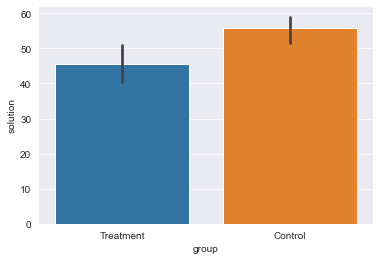

In [53]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "solution", data = dataBinary_milestones_valid)
plt.show()

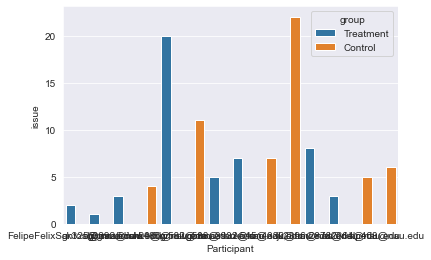

In [97]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "Participant", y = "issue", hue = "group", data = dataBinary_milestones_valid)
plt.show()

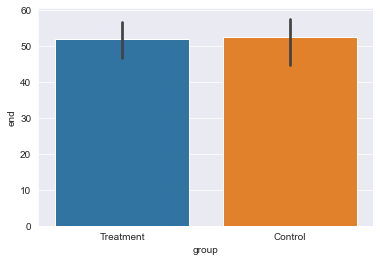

In [54]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "end", data = dataBinary_milestones_valid)
plt.show()

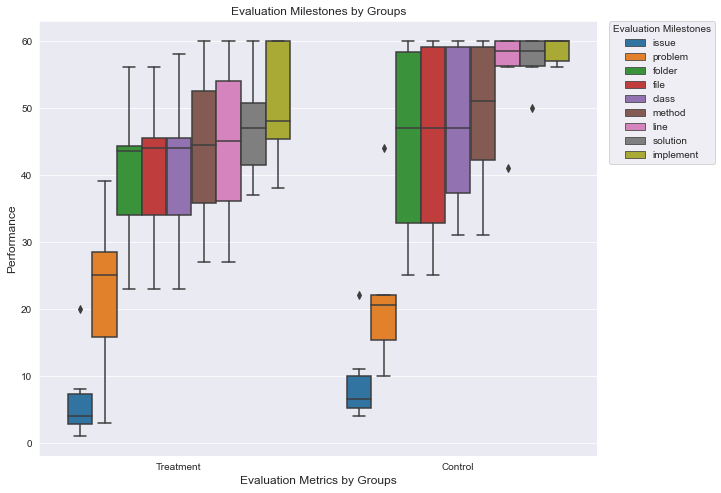

<Figure size 432x288 with 0 Axes>

In [55]:
dd=pd.melt(dataBinary_milestones_valid_60,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
plt.savefig("grouped_milestones_bygroups_60.pdf")


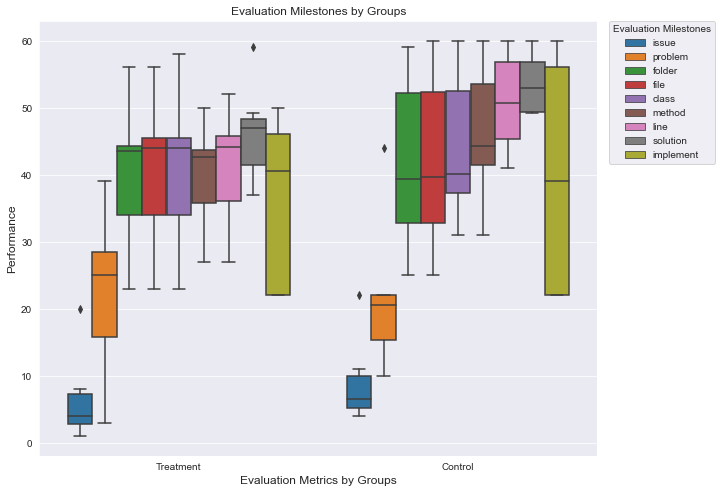

<Figure size 432x288 with 0 Axes>

In [56]:
dd=pd.melt(dataBinary_milestones_valid_mean,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
plt.savefig("grouped_milestones_bygroups_means.pdf")


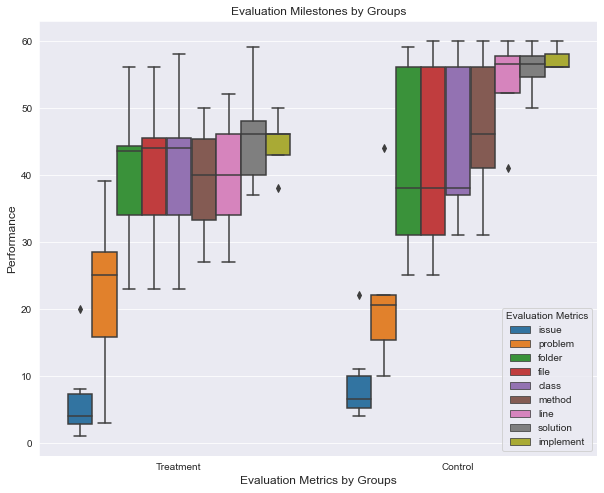

In [108]:
dd=pd.melt(dataBinary_milestones_valid,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
#ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=9, borderaxespad=0.)
ax.legend(h, labels, title="Evaluation Metrics")
plt.title("Evaluation Milestones by Groups", size=12)
plt.savefig("grouped_milestones_bygroups.pdf")
plt.show()


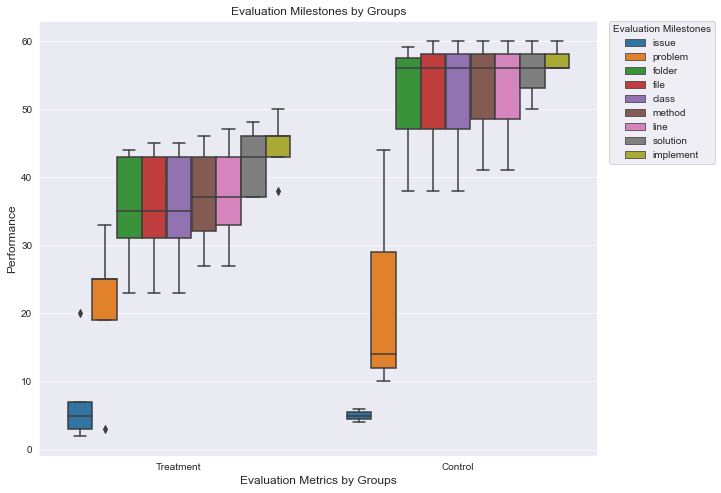

<Figure size 432x288 with 0 Axes>

In [88]:
dd=pd.melt(dataBinary_milestones_valid_NA,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
plt.savefig("grouped_milestones_bygroups_NA.pdf")


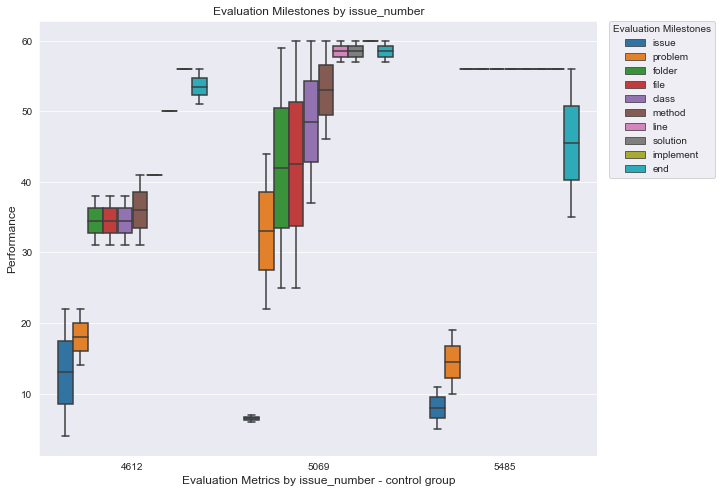

In [58]:
dd=pd.melt(dataBinary_milestones_valid_C,id_vars=['issue_number'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='issue_number',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by issue_number - control group",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by issue_number", size=12)
plt.show()

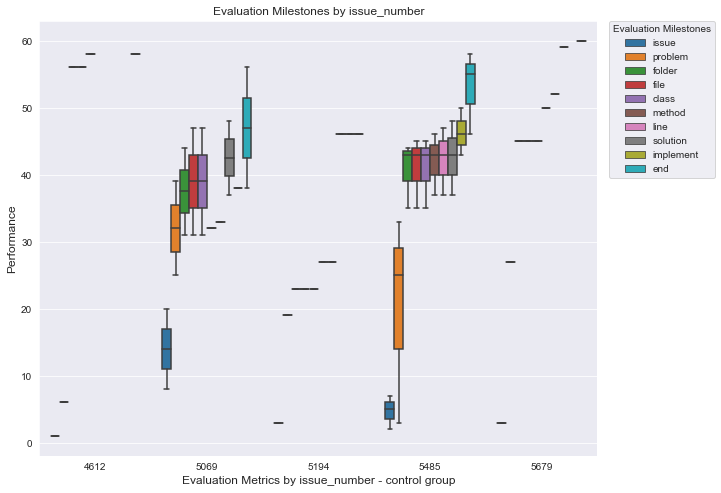

In [59]:
dd=pd.melt(dataBinary_milestones_valid_T,id_vars=['issue_number'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='issue_number',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by issue_number - control group",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by issue_number", size=12)
plt.show()

In [60]:
dataBinary_milestones_valid_5485 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 5485]

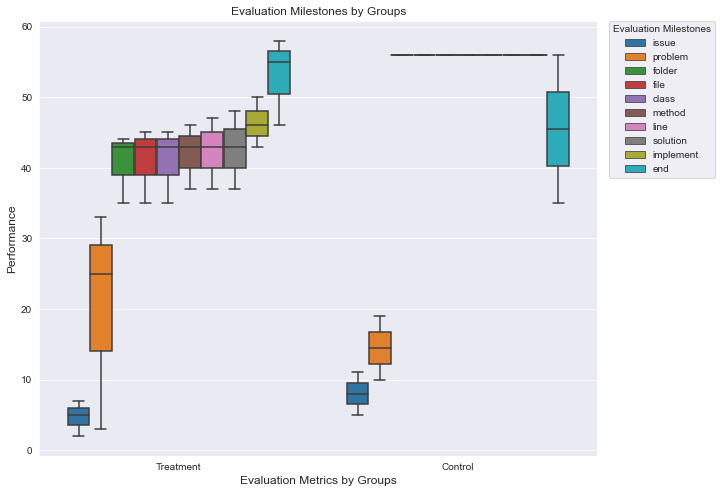

In [61]:
dd=pd.melt(dataBinary_milestones_valid_5485,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [62]:
dataBinary_milestones_valid_5485

,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55,Treatment,5485
7,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Control,5485
8,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46,Treatment,5485
9,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58,Treatment,5485
14,st2364@nau.edu,3:09 PM,5,10,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56,Control,5485


In [63]:
dataBinary_milestones_valid_5485.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,8.000000,14.500000,56.000000,56.0,56.0,56.0,56.000000,56.000000,56.000000,45.5,5485.0
Treatment,4.666667,20.333333,40.666667,41.0,41.0,42.0,42.333333,42.666667,46.333333,53.0,5485.0


In [64]:
dataBinary_milestones_valid_4612 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 4612]

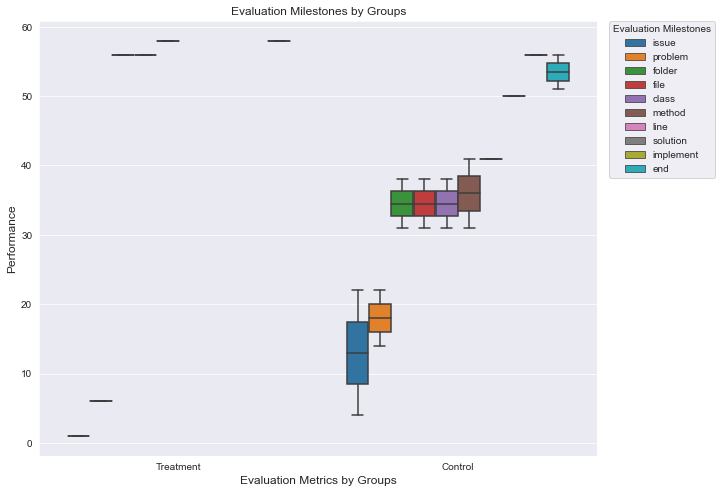

In [65]:
dd=pd.melt(dataBinary_milestones_valid_4612,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [66]:
dataBinary_milestones_valid_4612.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,13.0,18.0,34.5,34.5,34.5,36.0,41.0,50.0,56.0,53.5,4612.0
Treatment,1.0,6.0,56.0,56.0,58.0,NaN,NaN,NaN,NaN,58.0,4612.0


In [67]:
dataBinary_milestones_valid_4612

,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,NaN,NaN,NaN,NaN,58,Treatment,4612
4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56,Control,4612
11,sm4332@nau.edu,3:12 PM,22,22,31.0,31.0,31.0,31.0,NaN,NaN,NaN,51,Control,4612


In [68]:
dataBinary_milestones_valid_5069 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 5069]

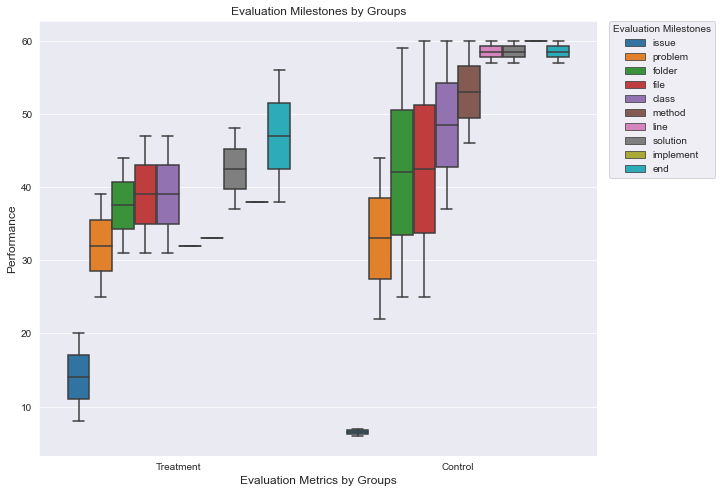

In [69]:
dd=pd.melt(dataBinary_milestones_valid_5069,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','class','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [70]:
dataBinary_milestones_valid_5069.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,6.5,33.0,42.0,42.5,48.5,53.0,58.5,58.5,60.0,58.5,5069.0
Treatment,14.0,32.0,37.5,39.0,39.0,32.0,33.0,42.5,38.0,47.0,5069.0


In [71]:
dataBinary_milestones_valid_5069

,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38,Treatment,5069
10,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,57.0,57.0,NaN,57,Control,5069
12,jk2396@nau.edu,5:03 PM,8,39,44.0,47.0,47.0,NaN,NaN,48.0,NaN,56,Treatment,5069
15,klp468@nau.edu,12:18 PM,6,44,59.0,60.0,60.0,60.0,60.0,60.0,60.0,60,Control,5069


In [72]:
dataBinary_milestones_valid.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,9.166667,21.833333,41.800,42.000,44.400,46.800000,53.500000,55.750000,57.333333,52.500,5055.333333
Treatment,6.125000,22.125000,40.125,40.625,40.875,39.166667,39.833333,45.428571,44.600000,52.125,5259.750000


In [73]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [74]:
#https://machinelearningmastery.com/effect-size-measures-in-python/
#Small Effect Size: d=0.20
#Medium Effect Size: d=0.50
#Large Effect Size: d=0.80

from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s


In [75]:
#dataBinary_milestones_valid_0=dataBinary_milestones_valid.fillna(0)
#dataBinary_milestones_valid_0

In [76]:
dataBinary_milestones_valid_NA=dataBinary_milestones_valid.dropna()
dataBinary_milestones_valid_NA

,Participant,start,issue,problem,folder,file,class,method,line,solution,implement,end,group,issue_number
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55,Treatment,5485
3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.0,23.0,27.0,27.0,46.0,46.0,46,Treatment,5194
4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56,Control,4612
5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38,Treatment,5069
8,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46,Treatment,5485
9,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58,Treatment,5485
14,st2364@nau.edu,3:09 PM,5,10,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56,Control,5485
15,klp468@nau.edu,12:18 PM,6,44,59.0,60.0,60.0,60.0,60.0,60.0,60.0,60,Control,5069


In [77]:
DF_valid_C = dataBinary_milestones_valid_NA[dataBinary_milestones_valid_NA.group == 'Control']
Val_C_I = DF_valid_C['issue'] 
Val_C_P = DF_valid_C['problem'] 
Val_C_Fo = DF_valid_C['folder'] 
Val_C_Fi = DF_valid_C['file'] 
Val_C_C = DF_valid_C['class'] 
Val_C_M = DF_valid_C['method']
Val_C_L = DF_valid_C['line'] 
Val_C_S = DF_valid_C['solution'] 
Val_C_Im = DF_valid_C['implement']
Val_C_E = DF_valid_C['end']


In [78]:
DF_valid_T = dataBinary_milestones_valid_NA[dataBinary_milestones_valid_NA.group == 'Treatment']
Val_T_I = DF_valid_T['issue'] 
Val_T_P = DF_valid_T['problem'] 
Val_T_Fo = DF_valid_T['folder'] 
Val_T_Fi = DF_valid_T['file'] 
Val_T_C = DF_valid_T['class'] 
Val_T_M = DF_valid_T['method']
Val_T_L = DF_valid_T['line'] 
Val_T_S = DF_valid_T['solution'] 
Val_T_Im = DF_valid_T['implement']
Val_T_E = DF_valid_T['end']

In [79]:
DF_valid_mean_C = dataBinary_milestones_valid_mean[dataBinary_milestones_valid_mean.group == 'Control']
Val_m_C_I = DF_valid_mean_C['issue'] 
Val_m_C_P = DF_valid_mean_C['problem'] 
Val_m_C_Fo = DF_valid_mean_C['folder'] 
Val_m_C_Fi = DF_valid_mean_C['file'] 
Val_m_C_C = DF_valid_mean_C['class'] 
Val_m_C_M = DF_valid_mean_C['method']
Val_m_C_L = DF_valid_mean_C['line'] 
Val_m_C_S = DF_valid_mean_C['solution'] 
Val_m_C_Im = DF_valid_mean_C['implement']
Val_m_C_E = DF_valid_mean_C['end']


In [80]:
DF_valid_mean_T = dataBinary_milestones_valid_mean[dataBinary_milestones_valid_mean.group == 'Treatment']
Val_m_T_I = DF_valid_mean_T['issue'] 
Val_m_T_P = DF_valid_mean_T['problem'] 
Val_m_T_Fo = DF_valid_mean_T['folder'] 
Val_m_T_Fi = DF_valid_mean_T['file'] 
Val_m_T_C = DF_valid_mean_T['class'] 
Val_m_T_M = DF_valid_mean_T['method']
Val_m_T_L = DF_valid_mean_T['line'] 
Val_m_T_S = DF_valid_mean_T['solution'] 
Val_m_T_Im = DF_valid_mean_T['implement']
Val_m_T_E = DF_valid_mean_T['end']


In [81]:
DF_valid_60_C = dataBinary_milestones_valid_60[dataBinary_milestones_valid_60.group == 'Control']
Val_60_C_I = DF_valid_60_C['issue'] 
Val_60_C_P = DF_valid_60_C['problem'] 
Val_60_C_Fo = DF_valid_60_C['folder'] 
Val_60_C_Fi = DF_valid_60_C['file'] 
Val_60_C_C = DF_valid_60_C['class'] 
Val_60_C_M = DF_valid_60_C['method']
Val_60_C_L = DF_valid_60_C['line'] 
Val_60_C_S = DF_valid_60_C['solution'] 
Val_60_C_Im = DF_valid_60_C['implement']
Val_60_C_E = DF_valid_60_C['end']


In [82]:
DF_valid_60_T = dataBinary_milestones_valid_60[dataBinary_milestones_valid_60.group == 'Treatment']
Val_60_T_I = DF_valid_60_T['issue'] 
Val_60_T_P = DF_valid_60_T['problem'] 
Val_60_T_Fo = DF_valid_60_T['folder'] 
Val_60_T_Fi = DF_valid_60_T['file'] 
Val_60_T_C = DF_valid_60_T['class'] 
Val_60_T_M = DF_valid_60_T['method']
Val_60_T_L = DF_valid_60_T['line'] 
Val_60_T_S = DF_valid_60_T['solution'] 
Val_60_T_Im = DF_valid_60_T['implement']
Val_60_T_E = DF_valid_60_T['end']



In [109]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(Val_C_I, Val_T_I)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_I(fail to reject H0)')
else:
	print('Different distribution Val_C_I(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_I', cliffsDelta(Val_C_I, Val_T_I))

# compare samples -----
stat, p = mannwhitneyu(Val_C_P, Val_T_P)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_P(fail to reject H0)')
else:
	print('Different distribution Val_C_P(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_P', cliffsDelta(Val_C_P, Val_T_P))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_Fo, Val_T_Fo)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_Fo(fail to reject H0)')
else:
	print('Different distribution Val_C_Fo(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_Fo', cliffsDelta(Val_C_Fo, Val_T_Fo))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_Fi, Val_T_Fi)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_Fi(fail to reject H0)')
else:
	print('Different distribution Val_C_Fi(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_Fi', cliffsDelta(Val_C_Fi, Val_T_Fi))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_C, Val_T_C)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_C(fail to reject H0)')
else:
	print('Different distribution Val_C_C(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_C', cliffsDelta(Val_C_C, Val_T_C))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_M, Val_T_M)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_M(fail to reject H0)')
else:
	print('Different distribution Val_C_M(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_M', cliffsDelta(Val_C_M, Val_T_M))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_L, Val_T_L)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_L(fail to reject H0)')
else:
	print('Different distribution Val_C_L(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_L', cliffsDelta(Val_C_L, Val_T_L))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_S, Val_T_S)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_S(fail to reject H0)')
else:
	print('Different distribution Val_C_S(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_S', cliffsDelta(Val_C_S, Val_T_S))

# compare samples-----------
stat, p = mannwhitneyu(Val_C_Im, Val_T_Im)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_C_Im(fail to reject H0)')
else:
	print('Different distribution Val_C_Im(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_C_Im', cliffsDelta(Val_C_Im, Val_T_Im))


Statistics=7.500, p=1.000
Same distribution Val_C_I(fail to reject H0)
Val_C_I (0.0, 'negligible')
Statistics=7.000, p=1.000
Same distribution Val_C_P(fail to reject H0)
Val_C_P (-0.06666666666666667, 'negligible')
Statistics=13.000, p=0.143
Same distribution Val_C_Fo(fail to reject H0)
Val_C_Fo (0.7333333333333333, 'large')
Statistics=13.000, p=0.143
Same distribution Val_C_Fi(fail to reject H0)
Val_C_Fi (0.7333333333333333, 'large')
Statistics=13.000, p=0.143
Same distribution Val_C_C(fail to reject H0)
Val_C_C (0.7333333333333333, 'large')
Statistics=13.000, p=0.143
Same distribution Val_C_M(fail to reject H0)
Val_C_M (0.7333333333333333, 'large')
Statistics=13.000, p=0.143
Same distribution Val_C_L(fail to reject H0)
Val_C_L (0.7333333333333333, 'large')
Statistics=15.000, p=0.036
Different distribution Val_C_S(reject H0)
Val_C_S (1.0, 'large')
Statistics=15.000, p=0.035
Different distribution Val_C_Im(reject H0)
Val_C_Im (1.0, 'large')


In [84]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(Val_m_C_I, Val_m_T_I)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_I(fail to reject H0)')
else:
	print('Different distribution Val_m_C_I(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_I', cliffsDelta(Val_m_C_I, Val_m_T_I))

# compare samples -----
stat, p = mannwhitneyu(Val_m_C_P, Val_m_T_P)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_P(fail to reject H0)')
else:
	print('Different distribution Val_m_C_P(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_P', cliffsDelta(Val_m_C_P, Val_m_T_P))

# compare samples-----------
stat, p = mannwhitneyu(Val_m_C_Fo, Val_m_T_Fo)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_Fo(fail to reject H0)')
else:
	print('Different distribution Val_m_C_Fo(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_T_P', cliffsDelta(Val_m_C_Fo, Val_m_T_Fo))

# compare samples-----------
stat, p = mannwhitneyu(Val_m_C_Fi, Val_m_T_Fi)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_Fi(fail to reject H0)')
else:
	print('Different distribution Val_m_C_Fi(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_Fi', cliffsDelta(Val_m_C_Fi, Val_m_T_Fi))

# compare samples-----------
stat, p = mannwhitneyu(Val_m_C_C, Val_m_T_C)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_C(fail to reject H0)')
else:
	print('Different distribution Val_m_C_C(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_C', cliffsDelta(Val_m_C_C, Val_m_T_C))

# compare samples-----------
stat, p = mannwhitneyu(Val_m_C_M, Val_m_T_M)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_M(fail to reject H0)')
else:
	print('Different distribution Val_m_C_M(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_M', cliffsDelta(Val_m_C_M, Val_m_T_M))

# compare samples-----------
stat, p = mannwhitneyu(Val_m_C_L, Val_m_T_L)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_L(fail to reject H0)')
else:
	print('Different distribution Val_m_C_L(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_L', cliffsDelta(Val_m_C_L, Val_m_T_L))

# compare samples-----------
stat, p = mannwhitneyu(Val_m_C_S, Val_m_T_S)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_S(fail to reject H0)')
else:
	print('Different distribution Val_m_C_S(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_S', cliffsDelta(Val_m_C_S, Val_m_T_S))

# compare samples-----------
stat, p = mannwhitneyu(Val_m_C_Im, Val_m_T_Im)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_m_C_Im(fail to reject H0)')
else:
	print('Different distribution Val_m_C_Im(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_m_C_Im', cliffsDelta(Val_m_C_Im, Val_m_T_Im))


Statistics=34.000, p=0.219
Same distribution Val_m_C_I(fail to reject H0)
Val_m_C_I (0.4166666666666667, 'medium')
Statistics=20.500, p=0.698
Same distribution Val_m_C_P(fail to reject H0)
Val_m_C_P (-0.14583333333333334, 'negligible')
Statistics=24.000, p=1.000
Same distribution Val_m_C_Fo(fail to reject H0)
Val_m_T_P (0.0, 'negligible')
Statistics=24.000, p=1.000
Same distribution Val_m_C_Fi(fail to reject H0)
Val_m_C_Fi (0.0, 'negligible')
Statistics=25.500, p=0.897
Same distribution Val_m_C_C(fail to reject H0)
Val_m_C_C (0.0625, 'negligible')
Statistics=30.500, p=0.436
Same distribution Val_m_C_M(fail to reject H0)
Val_m_C_M (0.2708333333333333, 'small')
Statistics=37.000, p=0.103
Same distribution Val_m_C_L(fail to reject H0)
Val_m_C_L (0.5416666666666666, 'large')
Statistics=42.000, p=0.023
Different distribution Val_m_C_S(reject H0)
Val_m_C_S (0.75, 'large')
Statistics=28.500, p=0.590
Same distribution Val_m_C_Im(fail to reject H0)
Val_m_C_Im (0.1875, 'small')


In [85]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(Val_60_C_I, Val_60_T_I)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_I(fail to reject H0)')
else:
	print('Different distribution Val_60_C_I(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_I', cliffsDelta(Val_60_C_I, Val_60_T_I))

# compare samples -----
stat, p = mannwhitneyu(Val_60_C_P, Val_60_T_P)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_P(fail to reject H0)')
else:
	print('Different distribution Val_60_C_P(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_P', cliffsDelta(Val_60_C_P, Val_60_T_P))

# compare samples-----------
stat, p = mannwhitneyu(Val_60_C_Fo, Val_60_T_Fo)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_Fo(fail to reject H0)')
else:
	print('Different distribution Val_60_C_Fo(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_T_P', cliffsDelta(Val_60_C_Fo, Val_60_T_Fo))

# compare samples-----------
stat, p = mannwhitneyu(Val_60_C_Fi, Val_60_T_Fi)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_Fi(fail to reject H0)')
else:
	print('Different distribution Val_60_C_Fi(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_Fi', cliffsDelta(Val_60_C_Fi, Val_60_T_Fi))

# compare samples-----------
stat, p = mannwhitneyu(Val_60_C_C, Val_60_T_C)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_C(fail to reject H0)')
else:
	print('Different distribution Val_60_C_C(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_C', cliffsDelta(Val_60_C_C, Val_60_T_C))

# compare samples-----------
stat, p = mannwhitneyu(Val_60_C_M, Val_60_T_M)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_M(fail to reject H0)')
else:
	print('Different distribution Val_60_C_M(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_M', cliffsDelta(Val_60_C_M, Val_60_T_M))

# compare samples-----------
stat, p = mannwhitneyu(Val_60_C_L, Val_60_T_L)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_L(fail to reject H0)')
else:
	print('Different distribution Val_60_C_L(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_L', cliffsDelta(Val_60_C_L, Val_60_T_L))

# compare samples-----------
stat, p = mannwhitneyu(Val_60_C_S, Val_60_T_S)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_S(fail to reject H0)')
else:
	print('Different distribution Val_60_C_S(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_S', cliffsDelta(Val_60_C_S, Val_60_T_S))

# compare samples-----------
stat, p = mannwhitneyu(Val_60_C_Im, Val_60_T_Im)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution Val_60_C_Im(fail to reject H0)')
else:
	print('Different distribution Val_60_C_Im(reject H0)')

   
#Effect_Size RandomForest Vs others   
print('Val_60_C_Im', cliffsDelta(Val_60_C_Im, Val_60_T_Im))


Statistics=34.000, p=0.219
Same distribution Val_60_C_I(fail to reject H0)
Val_60_C_I (0.4166666666666667, 'medium')
Statistics=20.500, p=0.698
Same distribution Val_60_C_P(fail to reject H0)
Val_60_C_P (-0.14583333333333334, 'negligible')
Statistics=29.000, p=0.560
Same distribution Val_60_C_Fo(fail to reject H0)
Val_60_T_P (0.20833333333333334, 'small')
Statistics=29.000, p=0.560
Same distribution Val_60_C_Fi(fail to reject H0)
Val_60_C_Fi (0.20833333333333334, 'small')
Statistics=30.500, p=0.437
Same distribution Val_60_C_C(fail to reject H0)
Val_60_C_C (0.2708333333333333, 'small')
Statistics=28.500, p=0.601
Same distribution Val_60_C_M(fail to reject H0)
Val_60_C_M (0.1875, 'small')
Statistics=36.000, p=0.129
Same distribution Val_60_C_L(fail to reject H0)
Val_60_C_L (0.5, 'large')
Statistics=40.500, p=0.036
Different distribution Val_60_C_S(reject H0)
Val_60_C_S (0.6875, 'large')
Statistics=36.000, p=0.112
Same distribution Val_60_C_Im(fail to reject H0)
Val_60_C_Im (0.5, 'large'

In [86]:
### Wilcoxon paired and dependent samples

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

#from scipy.stats import wilcoxon

#stat, p = wilcoxon(data1, data2)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#	print('Same distribution (fail to reject H0)')
#else:
#	print('Different distribution (reject H0)')

In [87]:
ConfusionMatrix =  './experiment/new/powertoys_w2v/powertoys_w2v_CM(1, 1)895Yes0.2RandomForest0.csv'
#classifierChain = './experiment/dfTesteClassifierChain_13Labels.csv'


CM = pd.read_csv(ConfusionMatrix, sep=",")

FileNotFoundError: [Errno 2] No such file or directory: './experiment/new/powertoys_w2v/powertoys_w2v_CM(1, 1)895Yes0.2RandomForest0.csv'

In [ ]:
#parsing Confusion matrix 

list(CM.columns) 
type(CM['0'])

columns = ['Label','TN', 'FP','FN','TP']
df = pd.DataFrame(columns=columns)

df['Label'], df['TN'], df['FP'], df['FN'], df['TP'] = CM['0'].str.split(',', 5).str
df = df.drop(0)


In [ ]:
df